In [ ]:
https://github.com/Noahbisht0/Brain_tumor-MRI-data.git

In [ ]:
#!pip install itk

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import nibabel as nib
import itk
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
sns.set_style('darkgrid')

In [ ]:
image_path = "BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


In [ ]:
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [ ]:
image_data.shape

(240, 240, 155, 4)

plotting layer 54 channel 0 of image


(-0.5, 239.5, 239.5, -0.5)

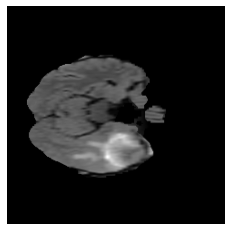

In [ ]:
maxval = 154 
i = np.random.randint(0,maxval)
channel = 0
print(f"plotting layer {i} channel {channel} of image")
plt.imshow(image_data[:,:,i,channel],cmap="gray")
plt.axis("off")

In [ ]:
def explore_3dimage(layer):
  plt.figure(figsize=(10,5))
  channel = 3
  plt.imshow(image_data[:,:,layer,channel],cmap='gray')
  plt.title('explore layers of brain MRI',fontsize=20)
  plt.axis('off')
  return layer
interact(explore_3dimage,layer=(0,image_data.shape[2] - 1))

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

<function __main__.explore_3dimage>

In [ ]:
label_path = "BRATS_001label.nii.gz"
label_obj  = nib.load(label_path)

In [ ]:
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [ ]:
label_array.shape
print(f"with unique values: {np.unique(label_array)}")
print("""Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor""")


with unique values: [0. 1. 2. 3.]
Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor


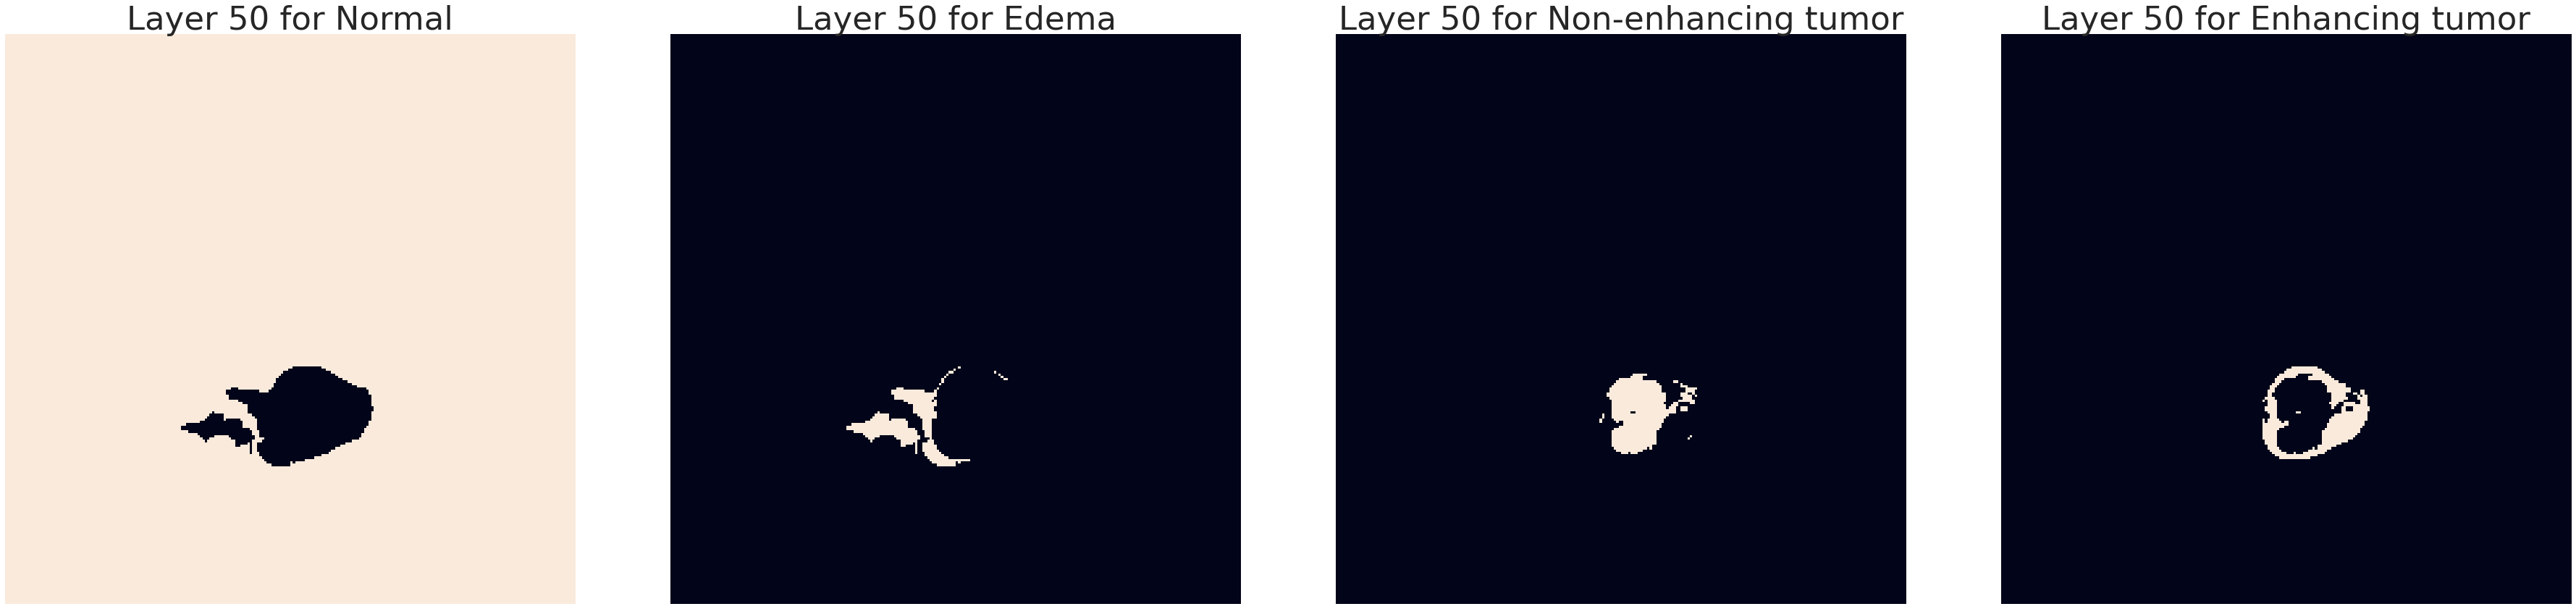

In [ ]:
layer = 50
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

In [ ]:
select_class = ToggleButtons(
    options=["Normal","Edema","Non-enhancing tumor","Enhancing tumor"],
    descriptions = 'select class',
    disabled = False,
    button_style = 'info'
)
select_layer = IntSlider(min=0,max=154,description="Select layer",continuous_update=False)
def plot_image(seg_class,layer):
  print(f"plotting {layer} layer label: {seg_class}")
  img_label = classes_dict[seg_class]
  mask = np.where(label_array[:,:,layer] == img_label,255,0)
  plt.figure(figsize=(10,5))
  plt.imshow(mask,cmap="gray")
  plt.axis("off")
interactive(plot_image,seg_class=select_class,layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='seg_class', options=('Normal', 'Edema', …

In [ ]:
import keras 
import pandas as pd 

In [ ]:
image = np.array([10,11,12,13,14,15])
image_length = image.shape[0]

In [ ]:
patch_length = 3
start_i = 0

In [ ]:
print(f"start index {start_i}")
end_i = start_i + patch_length
print(f"end index {end_i}")
sub_section = image[start_i:end_i]
print("output batch length: ",len(sub_section))
print("output patch array: ",sub_section)
start_i += 1

start index 0
end index 3
output batch length:  3
output patch array:  [10 11 12]


In [ ]:
print(f'the largest start index for which '
      f'a sub section is still valid is '
      f'{image_length - patch_length}')

the largest start index for which a sub section is still valid is 3


In [ ]:
print(f"The range of valid start indices is:")
valid_start_i = [i for i in range(image_length - patch_length + 1)]
print(valid_start_i)

The range of valid start indices is:
[0, 1, 2, 3]


In [ ]:
start_i = np.random.randint(image_length - patch_length + 1)
print(f"start index is: {start_i}")

start index is: 2


In [ ]:
for _ in range(10):
  start_i = np.random.randint(image_length - patch_length + 1)
  print(f"start index is: {start_i}")


start index is: 0
start index is: 3
start index is: 0
start index is: 2
start index is: 3
start index is: 3
start index is: 3
start index is: 0
start index is: 3
start index is: 3


In [ ]:
patch_labels = np.random.randint(0,4,(16))
print(patch_labels)

[0 0 1 2 0 3 3 3 3 3 0 2 3 3 3 3]


In [ ]:
bgrd_ratio = np.count_nonzero(patch_labels == 0) / len(patch_labels)
print("using np.count_nonzetro: ",bgrd_ratio)
bgrd_ratio = len(np.where(patch_labels == 0)[0]) / len(patch_labels)
print("using np.where",bgrd_ratio)

using np.count_nonzetro:  0.25
using np.where 0.25


In [ ]:
patch_label_one_hot = keras.utils.to_categorical(patch_labels,num_classes=4)
print(patch_label_one_hot)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
pd.DataFrame(patch_label_one_hot,columns=['background','edema','non-enhancing-tumor','enhancing-tumor'])

,background,edema,non-enhancing-tumor,enhancing-tumor
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0


In [ ]:
bgrd_ratio = np.sum(patch_label_one_hot[:,0]) / len(patch_labels)
print("bgrd ratio using one-hot: ",bgrd_ratio)

bgrd ratio using one-hot:  0.25
